# Log Analysis Notebook
Notebook này được thiết kế để phân tích dữ liệu log. Các bước thực hiện bao gồm:\n",
- Tạo dữ liệu log mẫu và lưu vào file CSV.
- Tải dữ liệu log từ file CSV và hiển thị thông tin cơ bản.
- Thực hiện các phân tích như thống kê số lượng log theo cấp độ, thời gian phản hồi trung bình theo module, và phân tích log theo thời gian.
- Vẽ các biểu đồ trực quan để hỗ trợ phân tích.

### Cài đặt các thư viện cần thiết
Các thư viện `pillow` và `matplotlib` được cài đặt hoặc cập nhật để đảm bảo môi trường hoạt động đúng.

In [ ]:
!pip install pillow
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


### Tạo dữ liệu log mẫu
Dữ liệu log mẫu được tạo với các thông tin như thời gian, cấp độ log, module, thông điệp và thời gian phản hồi. Sau đó, dữ liệu được lưu vào file CSV.

In [4]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Tạo dữ liệu log mẫu
log_levels = ['INFO', 'DEBUG', 'WARN', 'ERROR']
modules = ['auth', 'db', 'api', 'worker', 'scheduler']
messages = [
    "User login success",
    "User login failed",
    "DB connection timeout",
    "API response slow",
    "Worker started",
    "Job scheduled",
    "Missing required field",
    "Permission denied",
    "Unexpected error occurred",
    "Data saved successfully"
]

# Hàm tạo log giả
def generate_logs(num_rows=100):
    logs = []
    now = datetime.now()
    for _ in range(num_rows):
        timestamp = now - timedelta(seconds=random.randint(0, 100000))
        level = random.choice(log_levels)
        module = random.choice(modules)
        msg = random.choice(messages)
        response_time = round(random.uniform(0.1, 2.5), 3)  # thời gian phản hồi giả lập
        logs.append([timestamp.isoformat(), level, module, msg, response_time])
    return pd.DataFrame(logs, columns=["timestamp", "level", "module", "message", "response_time"])

# Tạo và lưu file CSV
log_df = generate_logs(100)
log_df

,timestamp,level,module,message,response_time
0,2025-04-15T23:45:00.830542,INFO,scheduler,API response slow,1.801
1,2025-04-15T11:21:56.830542,DEBUG,scheduler,Worker started,1.667
2,2025-04-16T00:24:57.830542,ERROR,db,User login failed,0.682
3,2025-04-16T01:42:34.830542,WARN,worker,API response slow,0.949
4,2025-04-15T11:57:24.830542,INFO,api,Permission denied,0.122
...,...,...,...,...,...
95,2025-04-16T01:12:33.830542,DEBUG,worker,DB connection timeout,0.966
96,2025-04-15T10:34:00.830542,INFO,db,API response slow,0.918
97,2025-04-16T00:38:44.830542,WARN,api,API response slow,1.321
98,2025-04-15T11:00:23.830542,DEBUG,auth,Worker started,0.844


In [5]:
csv_path = "./sample_logs.csv"
log_df.to_csv(csv_path, index=False)
csv_path

'./sample_logs.csv'

### Tải dữ liệu log từ file CSV
Dữ liệu log được tải từ file CSV và hiển thị trước 5 dòng đầu tiên để kiểm tra nội dung.

In [6]:
# Log Analysis Notebook Example
import pandas as pd
import matplotlib.pyplot as plt

# Load file CSV
log = pd.read_csv("sample_logs.csv", parse_dates=["timestamp"])

# Xem trước dữ liệu
log.head()

,timestamp,level,module,message,response_time
0,2025-04-15 23:45:00.830542,INFO,scheduler,API response slow,1.801
1,2025-04-15 11:21:56.830542,DEBUG,scheduler,Worker started,1.667
2,2025-04-16 00:24:57.830542,ERROR,db,User login failed,0.682
3,2025-04-16 01:42:34.830542,WARN,worker,API response slow,0.949
4,2025-04-15 11:57:24.830542,INFO,api,Permission denied,0.122


### Thống kê số lượng log theo cấp độ
Thực hiện thống kê số lượng log theo từng cấp độ (`INFO`, `DEBUG`, `WARN`, `ERROR`).

In [7]:
# Thống kê số lượng log theo level
log_level_counts = log['level'].value_counts()
print("Log count by level:")
print(log_level_counts)

Log count by level:
level
INFO     28
DEBUG    26
WARN     24
ERROR    22
Name: count, dtype: int64


### Vẽ biểu đồ phân phối cấp độ log
Biểu đồ cột hiển thị số lượng log theo từng cấp độ.

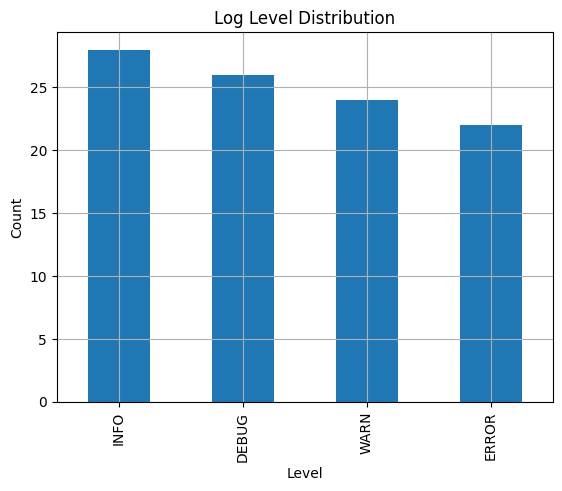

In [8]:
# Vẽ biểu đồ log level
log_level_counts.plot(kind='bar', title='Log Level Distribution')
plt.xlabel('Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Thống kê thời gian phản hồi trung bình theo module
Tính toán thời gian phản hồi trung bình của từng module và sắp xếp theo thứ tự giảm dần.

In [9]:
# Thống kê response_time trung bình theo module
avg_response_by_module = log.groupby('module')['response_time'].mean().sort_values(ascending=False)
print("\nAverage Response Time by Module:")
print(avg_response_by_module)


Average Response Time by Module:
module
scheduler    1.490846
db           1.355250
worker       1.352000
api          1.268800
auth         1.236800
Name: response_time, dtype: float64


### Vẽ biểu đồ thời gian phản hồi trung bình theo module
Biểu đồ thanh ngang hiển thị thời gian phản hồi trung bình của từng module.

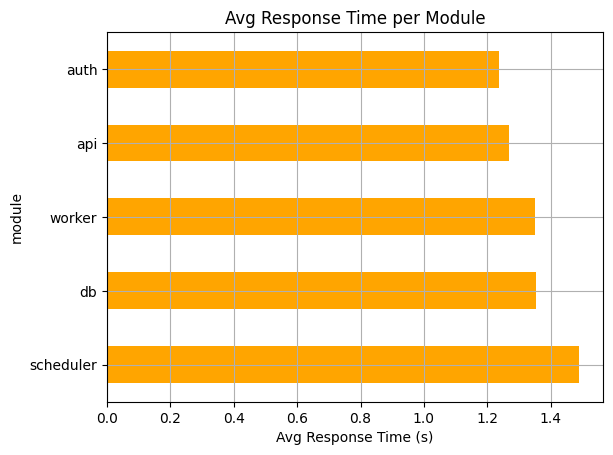

In [10]:
# Vẽ biểu đồ response_time theo module
avg_response_by_module.plot(kind='barh', title='Avg Response Time per Module', color='orange')
plt.xlabel('Avg Response Time (s)')
plt.grid(True)
plt.show()

### Phân tích log ERROR và số lượng log theo giờ
Lọc các log có cấp độ `ERROR` và phân tích số lượng log theo từng giờ trong ngày.


Top 5 ERROR logs:
                    timestamp  level     module                    message  \
2  2025-04-16 00:24:57.830542  ERROR         db          User login failed   
14 2025-04-16 11:09:38.830542  ERROR        api  Unexpected error occurred   
15 2025-04-15 09:34:33.830542  ERROR       auth         User login success   
22 2025-04-16 02:12:23.830542  ERROR  scheduler  Unexpected error occurred   
24 2025-04-16 10:47:32.830542  ERROR     worker              Job scheduled   

    response_time  
2           0.682  
14          1.610  
15          0.835  
22          1.047  
24          2.265  


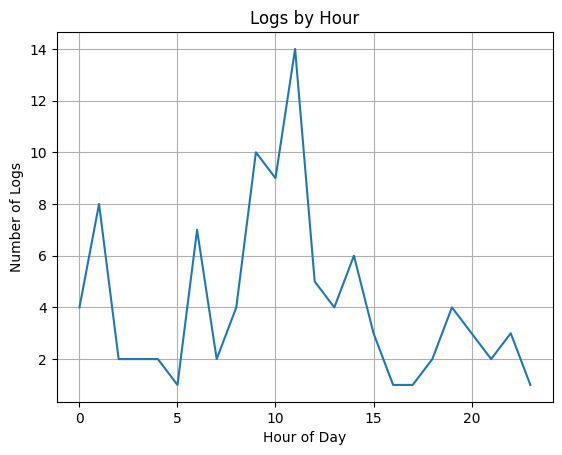

In [11]:
# Lọc các log ERROR
error_logs = log[log['level'] == 'ERROR']
print(f"\nTop 5 ERROR logs:")
print(error_logs.head())

# Phân tích theo thời gian: số log theo giờ
log['hour'] = log['timestamp'].dt.hour
log_per_hour = log['hour'].value_counts().sort_index()
log_per_hour.plot(kind='line', title='Logs by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logs')
plt.grid(True)
plt.show()